# Balancing a centrifuge

Learn how to balance out a centrifuge, in many cases this is even possible with an odd number of slots to fill! This assumes centrifuges with an even number of slots (6, 12, 20, 24, or 30 slots).

For a start we define the number of slots our centrifuge should have. The default is 30, but you can enter any even number below

In [1]:
slots_in_centrifuge=30  #default = 30, assumes standard centrifuges and even number of slots (6, 12, 20, 24, or 30 slots)

Now we can define some further parameters for the visualization:

In [2]:
rows_in_picture=5       #default = 5,   make sure rows*columns >= slots in centrifuge. Otherwise error.
columns_in_picture=6    #default = 6
slot_circle_size=15    #default = 15
text_size=20       #default = 20
size_slot_outline=5    #default = 5

And now we are ready to create the plot:

In [3]:
dir.create('img', showWarnings = FALSE)
local_path_to_save_file <- 'img/centrifuge_plot.png'

png(local_path_to_save_file, height = rows_in_picture*1200, width = columns_in_picture*1200, units = "px", res = 100)

par(mfrow=c(rows_in_picture,columns_in_picture))

#plot the first case, 1 tube, which is impossible
plot(0, 0, pch="n", xlim=c(-1.2, 1.2), ylim=c(-1.2, 1.2), xaxt="n", yaxt="n", xlab="", ylab="", type="n")
text(0, 0, 1, cex=text_size)
points(0, 0, pch=4, cex=200,  lwd = 5)


#fill in slots
for(tubes in 2:(slots_in_centrifuge-2)){


	#make a plot and put the number of tubes in the middle of the plot
	plot(0, 0, pch="n", xlim=c(-1.2, 1.2), ylim=c(-1.2, 1.2), xaxt="n", yaxt="n", xlab="", ylab="", type="n")
	text(0, 0, tubes, cex=text_size)
	
	
	
	#if divisible by 2, and number of slots in centrifuge also divisible by 2, always split into a top and bottom set and plot
	if(tubes%%2 == 0 & slots_in_centrifuge%%2 == 0){
		#First make a circle with empty slots
		for(slot in 1:slots_in_centrifuge){
			a=slot*pi/(slots_in_centrifuge/2)
			points(x = 0 + 1 * cos(a), y = 0 + 1 * sin(a), cex=slot_circle_size, lwd=size_slot_outline)
		}
		#now fill the appropriate slots
		top=1:(tubes/2)
		bottom=((slots_in_centrifuge/2)+1):((slots_in_centrifuge/2)+(tubes/2))
		c(top, bottom)->filled		
		for(f in filled){
			a=f*pi/(slots_in_centrifuge/2)
			points(x = 0 + 1 * cos(a), y = 0 + 1 * sin(a), pch=16, cex=slot_circle_size, col="blue")
		}
	}
	
	
	
	#if only divisible by 3, and the centrifuge has a number of slots divisible by 3, split into thirds.
	if(tubes%%3 == 0 & tubes%%2 > 0 & slots_in_centrifuge%%3 == 0){
		#First make a circle with empty slots
		for(slot in 1:slots_in_centrifuge){
			a=slot*pi/(slots_in_centrifuge/2)
			points(x = 0 + 1 * cos(a), y = 0 + 1 * sin(a), cex=slot_circle_size, lwd=size_slot_outline)
		}
		#now fill the appropriate slots
		batch1=1:(tubes/3)
		batch2=((1*slots_in_centrifuge/3)+1):((1*slots_in_centrifuge/3)+(tubes/3))
		batch3=((2*slots_in_centrifuge/3)+1):((2*slots_in_centrifuge/3)+(tubes/3))
		c(batch1, batch2, batch3)->filled
		for(f in filled){
			a=f*pi/(slots_in_centrifuge/2)
			points(x = 0 + 1 * cos(a), y = 0 + 1 * sin(a), pch=16, cex=slot_circle_size, col="red")
		}
	}
	
	
	
	#For the rest, divide first by 3, then fill in remainder by 2. (as long as total slots divisible by 2 and 3)
	if(tubes%%3 > 0 & tubes%%2 > 0 & slots_in_centrifuge%%3 == 0 & slots_in_centrifuge%%2 == 0){
		
		#First make a circle with empty slots
		for(slot in 1:slots_in_centrifuge){
			a=slot*pi/(slots_in_centrifuge/2)
			points(x = 0 + 1 * cos(a), y = 0 + 1 * sin(a), cex=slot_circle_size, lwd=size_slot_outline)
		}
		#now fill the appropriate slots
		#first fill a group of 3
		batch1=1
		batch2=((1*slots_in_centrifuge/3)+1)
		batch3=((2*slots_in_centrifuge/3)+1)
		c(batch1, batch2, batch3)->filled3
		for(f in filled3){
			a=f*pi/(slots_in_centrifuge/2)
			points(x = 0 + 1 * cos(a), y = 0 + 1 * sin(a), pch=16, cex=slot_circle_size, col="red")
		}
		tubes-3 -> tubes
	
		#now fill the remaining by two, but ignore those which are "filled"
		pos=2
		while(tubes>0){
			top=pos
			bottom=pos+(slots_in_centrifuge/2)
			c(top, bottom)->filled2
			if(sum(match(filled2, filled3, nomatch=0))==0){
				for(f in filled2){
					a=f*pi/(slots_in_centrifuge/2)
					points(x = 0 + 1 * cos(a), y = 0 + 1 * sin(a), pch=16, cex=slot_circle_size, col="blue")
				}
			tubes=tubes-2
			}
		pos+1->pos
		}
	}
	
	
	#if it's not possible on the centrifuge, put an X.  
	#if the number of tubes is only cleanly divisible by 3, or is not cleanly divisible 
	#by 3 or 2, and if the centrifuge
	# doesn't have slots cleanly divisible by 3, it is impossible
	if(tubes%%3>=0 & tubes%%2 > 0 & slots_in_centrifuge%%3 > 0){
		points(0, 0, pch=4, cex=200,  lwd = 5)
	}

}

#plot the second to last case as an X, which is also impossible
plot(0, 0, pch="n", xlim=c(-1.2, 1.2), ylim=c(-1.2, 1.2), xaxt="n", yaxt="n", xlab="", ylab="", type="n")
text(0, 0,slots_in_centrifuge-1, cex=text_size)
points(0, 0, pch=4, cex=200,  lwd = 5)

#plot the last case, in which all are filled
plot(0, 0, pch="n", xlim=c(-1.2, 1.2), ylim=c(-1.2, 1.2), xaxt="n", yaxt="n", xlab="", ylab="", type="n")
	for(slot in 1:slots_in_centrifuge){
		a=slot*pi/(slots_in_centrifuge/2)
		points(x = 0 + 1 * cos(a), y = 0 + 1 * sin(a), cex=slot_circle_size, lwd=size_slot_outline)
	}
1:slots_in_centrifuge->filled
	for(f in filled){
		a=f*pi/(slots_in_centrifuge/2)
		points(x = 0 + 1 * cos(a), y = 0 + 1 * sin(a), pch=16, cex=slot_circle_size, col="blue")
	}
text(0, 0, slots_in_centrifuge, cex=text_size)
title("Derek S Lundberg, Twitter @DerekSeveri", cex.main=4)

if(rows_in_picture*columns_in_picture<slots_in_centrifuge){
	print("ERROR: not enough rows and columns to show every possibility")
	par(mfrow=c(1,1))
	plot(0, 0, pch="n", xlim=c(-1.2, 1.2), ylim=c(-1.2, 1.2), xaxt="n", yaxt="n", xlab="", ylab="", type="n")
	text(0, 0, "ERROR: not enough rows and columns to show every possibility", cex=4)
}
if(slots_in_centrifuge%%2>0){
	print("ERROR: odd number of slots in centrifuge")
	par(mfrow=c(1,1))
	plot(0, 0, pch="n", xlim=c(-1.2, 1.2), ylim=c(-1.2, 1.2), xaxt="n", yaxt="n", xlab="", ylab="", type="n")
	text(0, 0, "ERROR: odd number of slots in centrifuge", cex=4)
}

dev.off()


pdf 
  2

The image is saved in `img/centrifuge_plot.png`, but we can also just show it inline here with the code below: 

Loading required package: png


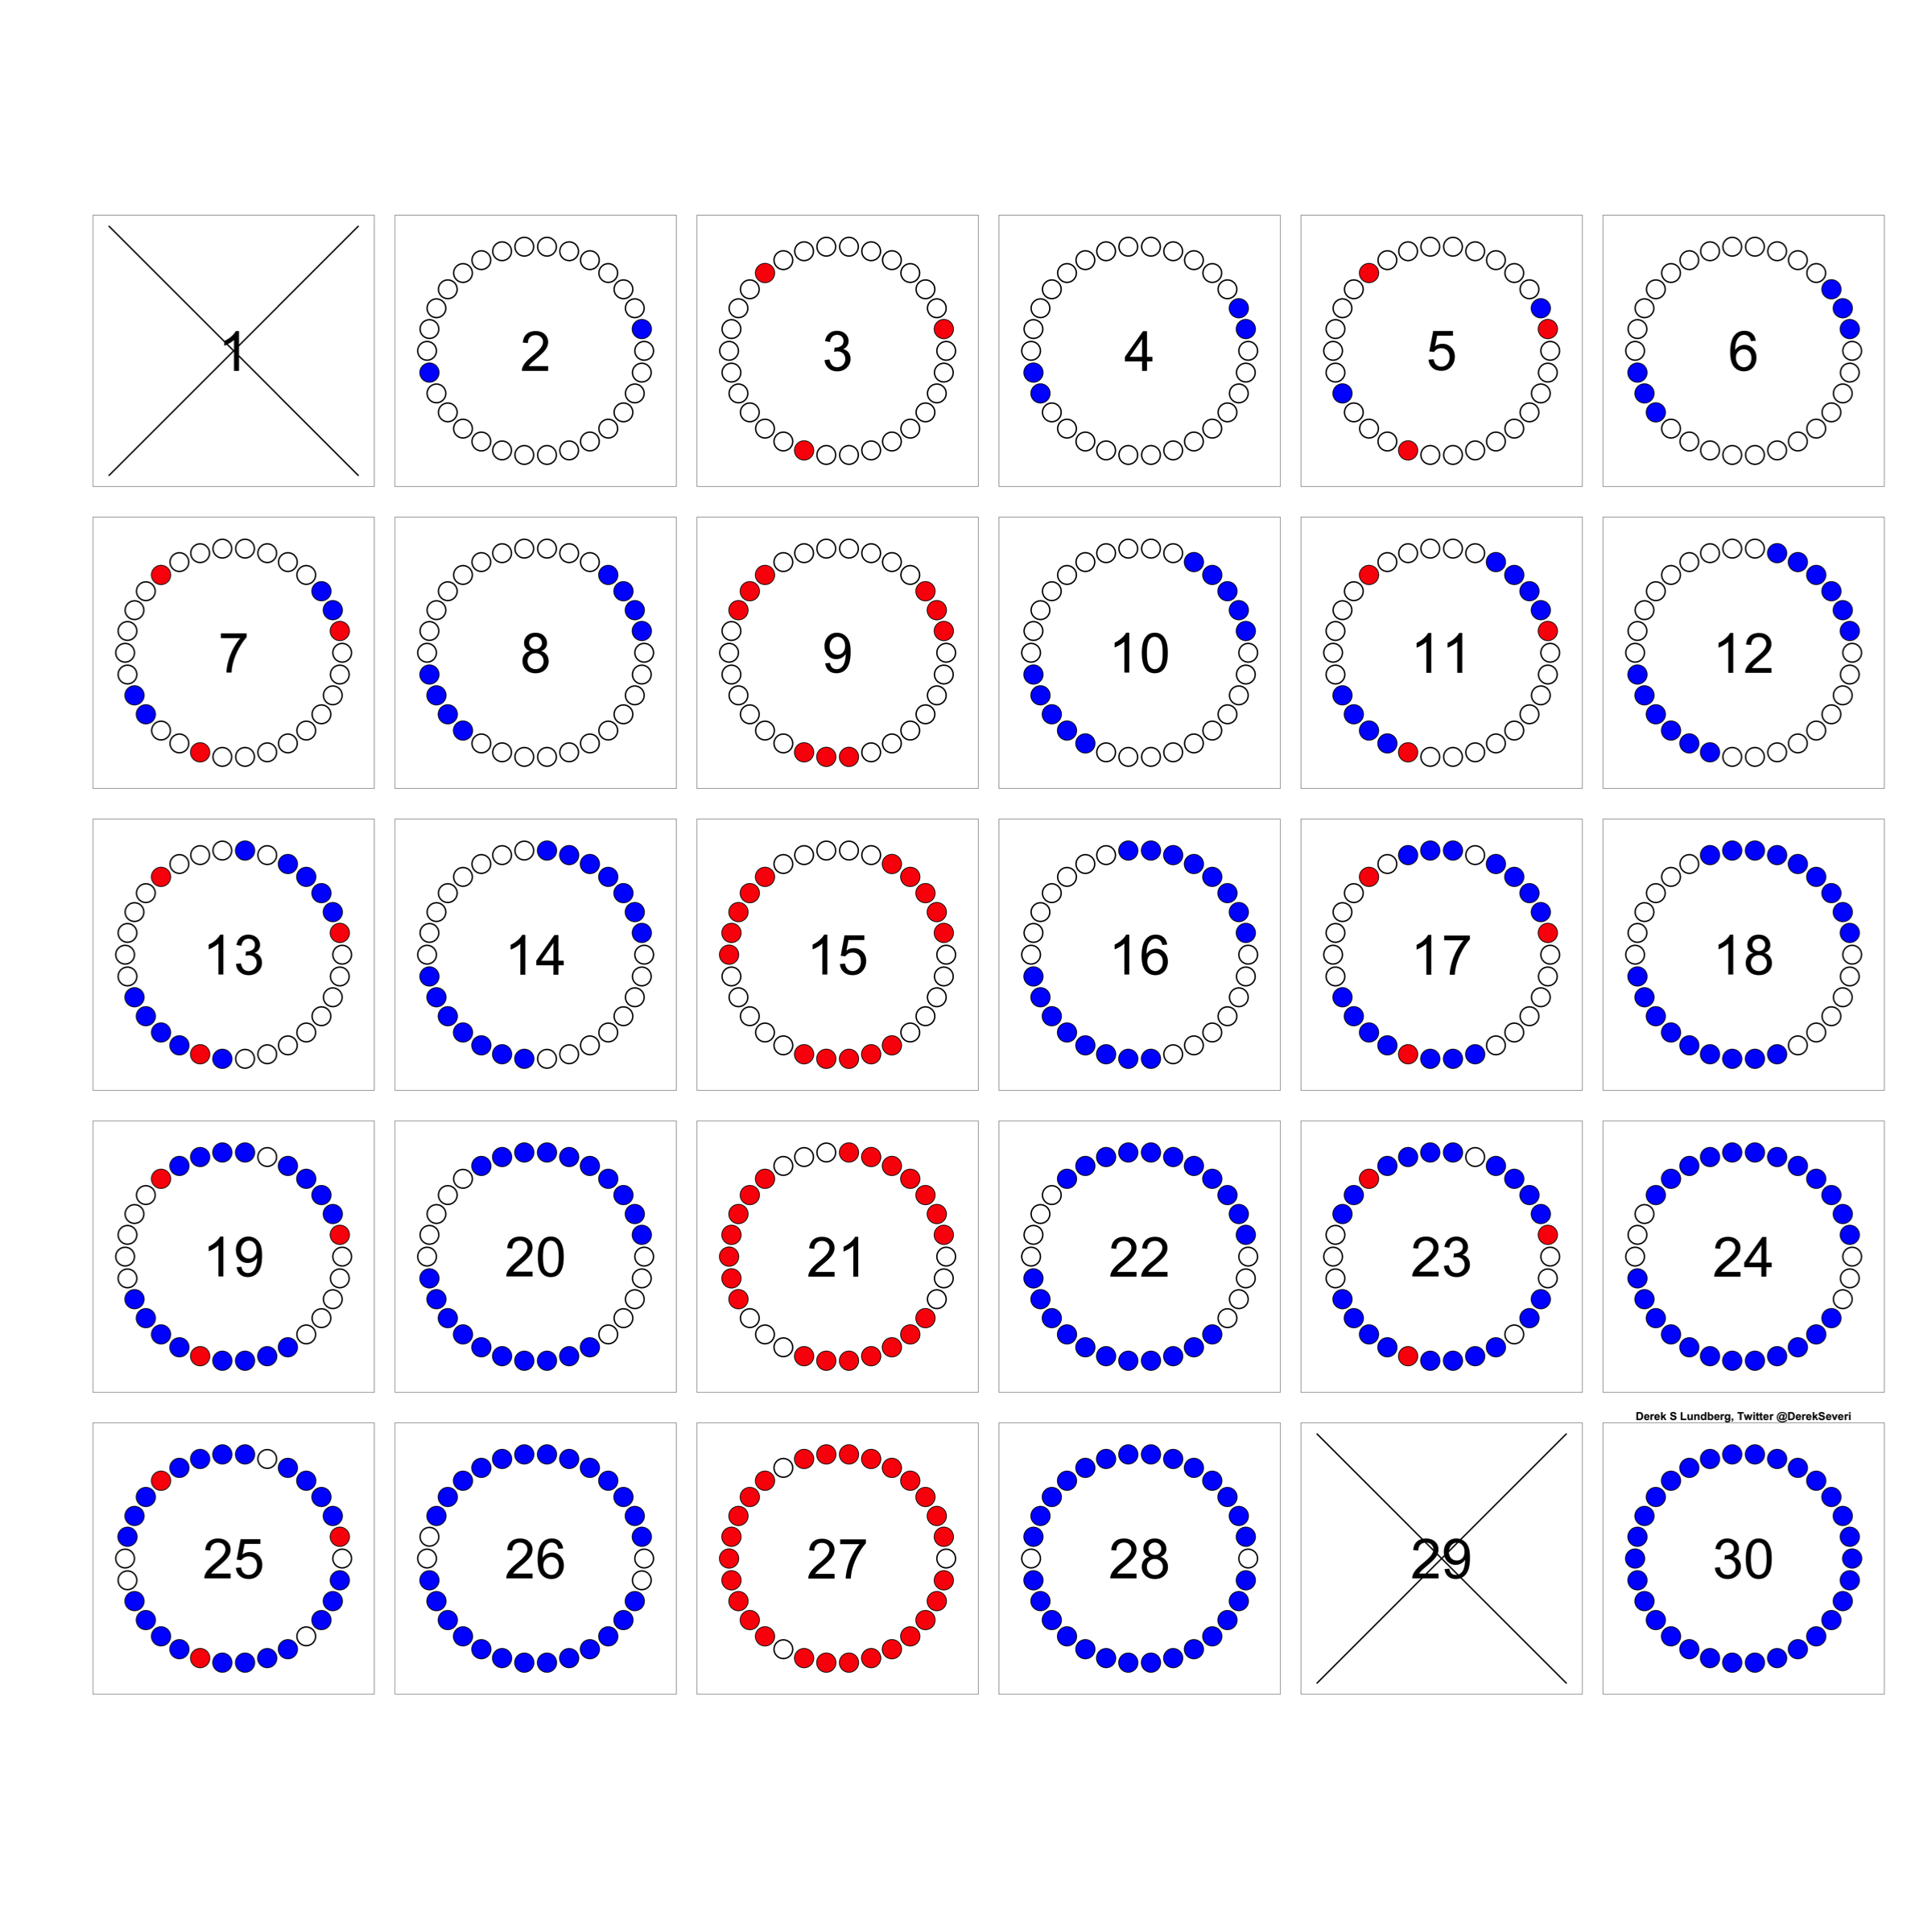

In [4]:
options(repr.plot.width  = 20,
        repr.plot.height = 20)
plot_png = function(path, add=FALSE)
{
  require('png')
  png = readPNG(path, native=T) # read the file
  res = dim(png)[2:1] # get the resolution, [x, y]
  if (!add) # initialize an empty plot area if add==FALSE
    plot(1,1,xlim=c(1,res[1]),ylim=c(1,res[2]),asp=1,type='n',xaxs='i',yaxs='i',xaxt='n',yaxt='n',xlab='',ylab='',bty='n')
  rasterImage(png,1,1,res[1],res[2])
}
plot_png('img/centrifuge_plot.png')
    
# code adapted from https://stackoverflow.com/questions/9543343/plot-a-jpg-image-using-base-graphics-in-r